<a href="https://colab.research.google.com/github/n0tArias/CalculadoraRMI/blob/main/S4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ivanvladimir/maquinas_notebooks/blob/main/lfya/05%20Gram%C3%A1ticas%20libres%20de%20contexto%20en%20su%20habitat...%20y%20AP.ipynb)


# 05 Gramáticas libres de contexto en su habitat... y AP

Esta notebook ilustra los conceptos de [**Gramáticas libres de contexto en su habitat... y AP**](https://ivanvladimir.gitlab.io/lfya_book/docs/05gram%C3%A1ticaslibresdecontextoensuh%C3%A1bitatyap/) correspondiente al curso de [**Lenguajes Formales y Autómatas**](https://turing.iimas.unam.mx/~ivanvladimir/page/curso_lfya/)


## Instrucciones

1. Si la librería [**maquinas**](https://pypi.org/project/maquinas/) no está instalada ejecutar la celdas correspondiente a la sección marcada con ◉
2. Importar los módulos de librería relevantes
3. Ejecuar las celdas para explorar los conceptos


## Licencia de la notebook

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/80x15.png" /></a>
</br>This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.

## General information

> **Author(s)**: <a href="https://twitter.com/ivanvladimir">@ivanvladimir</a></br>
> **Last updated**: 24/01/2023

### ◉ Instalando la librería

Se instala la librería [maquinas](https://pypi.org/project/maquinas/)

**Requerido en colab**, _opcional en ambiente local a través de jupyter_

In [3]:
# Execute if not installed
!pip install maquinas --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 40.4 MB/s eta 0:00:00


### 01 Importar módulos

Se importan las [Gramaticas Libres de Contexto](https://ivanvladimir.gitlab.io/lfya_book/docs/04abropar%C3%A9ntesisabropar%C3%A9ntesiscierropar%C3%A9ntesis/03gram%C3%A1ticaslibresdecontexto/) (CFG), las [Gramáticas Regulares](https://ivanvladimir.gitlab.io/lfya_book/docs/05gram%C3%A1ticaslibresdecontextoensuh%C3%A1bitatyap/07gram%C3%A1ticasregulares/) (RG) y [Autómatas de pila](https://ivanvladimir.gitlab.io/lfya_book/docs/05gram%C3%A1ticaslibresdecontextoensuh%C3%A1bitatyap/08aut%C3%B3matasdepila/) (AP)

In [4]:
from maquinas.contextfree.cfg import ContextFreeGrammar as CFG
from maquinas.regular.rg import RegularGrammar as RG
from maquinas.contextfree.pda import PushDownAutomaton as PDA
from maquinas.simulation import Simulation
from maquinas.io import load_pda

## 02 Ambigüedad

Algunas gramáticas tienen la propiedad de ser [ambiguas](https://ivanvladimir.gitlab.io/lfya_book/docs/05gram%C3%A1ticaslibresdecontextoensuh%C3%A1bitatyap/08aut%C3%B3matasdepila/)

In [39]:
gato=CFG('S->aA; S->a; S->epsilon; A->Cb; A->Ba; B->Dc; B->d; B->epsilon; C->Fb; C->Sb; C->E; E->CaS; E->Ba')
gato.print_summary()

No terminal : B, E, A, C, S
Terminals   : c, d, a, D, F, b
Start       : S
Productions :
 S → aA | a | ε
 A → Cb | Ba
 B → Dc | d | ε
 C → Fb | Sb | E
 E → CaS | Ba


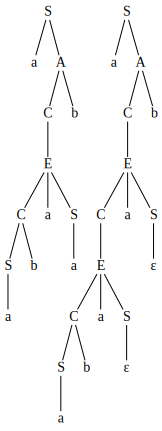

In [48]:
roots,chart,forest=gato.parse('aabaab')
gato.graph_trees(gato.extract_trees(forest))

### Gramática no ambigua para ER

Algunas gramáticas comienzan como <a href="https://ivanvladimir.gitlab.io/lfya_book/docs/04abroparéntesisabroparéntesiscierparéntesis/04ejemplogramática/">ambiguas</a> ... pueden re-escribirse para que [no lo sean](https://ivanvladimir.gitlab.io/lfya_book/docs/05gram%C3%A1ticaslibresdecontextoensuh%C3%A1bitatyap/03gram%C3%A1ticanoambigua/)

In [35]:
re=CFG('S->aA; S->a; S->epsilon; E->aA; E->a; A->Cb; A->Ba; B->d; C->Eb; C->Ba; C->EbF; B->BaF; F->aE; F->aEF')
re.print_summary()

No terminal : B, E, A, C, F, S
Terminals   : b, a, d
Start       : S
Productions :
 S → aA | a | ε
 E → aA | a
 A → Cb | Ba
 B → d | BaF
 C → Eb | Ba | EbF
 F → aE | aEF


In [49]:
roots,chart,forest=re.parse('aabaab')
trees=list(re.extract_trees(forest))
for i,step in enumerate(re.derivation(trees[0])):
    if not i:
        print("".join(step),end="")
    else:
        print(" ⇒ ","".join(step),end="\n ")

S ⇒  aA
  ⇒  aA
  ⇒  aCb
  ⇒  aEbFb
  ⇒  aabFb
  ⇒  aabFb
  ⇒  aabFb
  ⇒  aabaEb
  ⇒  aabaEb
  ⇒  aabaab
  ⇒  aabaab
  ⇒  aabaab
 

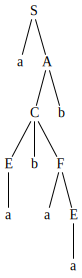

In [50]:
re.graph_trees(trees)

### Gramática ambigua

Otras gramáticas es imposible reducirlas para que no sean ambiguas

In [ ]:
ambigua=CFG('S -> X; S -> R; X-> YZ; Y -> aYb; Y-> epsilon;  Z -> cZd; Z -> epsilon; R -> aRd; R -> T; T ->bTc ; T -> epsilon')
ambigua.print_summary()

In [ ]:
roots,chart,forest=ambigua.parse('aabbcd')
trees=list(ambigua.extract_trees(forest))
for i,step in enumerate(ambigua.derivation(trees[0])):
    if not i:
        print("".join(step),end="")
    else:
        print(" ⇒ ","".join(step),end="\n ")

In [ ]:
ambigua.graph_trees(trees)

In [ ]:
roots,chart,forest=ambigua.parse('aabcdd')
trees=list(ambigua.extract_trees(forest))
for i,step in enumerate(ambigua.derivation(trees[0])):
    if not i:
        print("".join(step),end="")
    else:
        print(" ⇒ ","".join(step),end="\n ")

In [ ]:
ambigua.graph_trees(trees)

In [ ]:
roots,chart,forest=ambigua.parse('aabbccdd')
trees=list(ambigua.extract_trees(forest))
for i,step in enumerate(ambigua.derivation(trees[0])):
    if not i:
        print("".join(step),end="")
    else:
        print(" ⇒ ","".join(step),end="\n ")

In [ ]:
ambigua.graph_trees(trees)

### Gramáticas regulares

Además de las CFG, existen [Gramáticas Regulares](https://ivanvladimir.gitlab.io/lfya_book/docs/05gram%C3%A1ticaslibresdecontextoensuh%C3%A1bitatyap/07gram%C3%A1ticasregulares/)

In [34]:
regular=RG("S->aA; S->a; S->epsilon; E->aA; E->a; A->Cb; A->Ba; B->d; C->Eb; C->Ba; C->EbF; B->BaF; F->aE; F->aEF")
print(regular.summary())

IndexError: list index out of range

In [ ]:
roots,chart,forest=regular.parse('abc')
trees=list(regular.extract_trees(forest))
for i,step in enumerate(regular.derivation(trees[0])):
    if not i:
        print("".join(step),end="")
    else:
        print(" ⇒ ","".join(step),end="\n ")

In [ ]:
regular.graph_trees(trees)

## 03 Autómata de Pila

Se puede crear un [AP](https://ivanvladimir.gitlab.io/lfya_book/docs/05gram%C3%A1ticaslibresdecontextoensuh%C3%A1bitatyap/08aut%C3%B3matasdepila/) desde código; la función _load_pda_ permite cargar la definición desde una cadena con formato de tabla

In [ ]:
aⁿbⁿ=PDA(Q=['q_0','q_1','q_2'],
         sigma=['a','b'],
         gamma=['A'],
         q_0='q_0',
         A=['q_2'],
         delta=[
            (('q_0','a','Z0'),[('q_0','AZ0')]),
            (('q_0','a','A'),[('q_0','AA')]),
            (('q_0','b','A'),[('q_1','epsilon')]),
            (('q_1','b','A'),[('q_1','epsilon')]),
            (('q_1','epsilon','Z0'),[('q_2','Z0')])
         ]
    )
aⁿbⁿ.print_summary()

In [ ]:
aⁿbⁿ=load_pda("""
        |     ε     |          a          |    b    |
 ->q_0  |           | Z₀/AZ₀→q_0,A/AA→q_0 | A/ε→q_1 |
   q_1  | Z₀/Z₀→q_2 |                     | A/ε→q_1 |
   q_2] |           |                     |         |
""")
aⁿbⁿ.print_summary()

In [ ]:
for q,a,w_ in aⁿbⁿ.delta_stepwise("aaabb"):
    if a:
        print(f"{a} -> {aⁿbⁿ.states2string(q)}", end=",\n ")
    else:
        print(f"{aⁿbⁿ.states2string(q)}",end="\n ")
    res=q

print(f"\nCon {aⁿbⁿ.states2string(res)} Se acepta?", "Sí" if anbn.acceptor(res) else "No" )

In [ ]:
aⁿbⁿ.graph(dpi="100")

In [ ]:
aⁿbⁿ.save_gif("aaabbb",'anbn.gif',show=True)